In [1]:
import torch

from IPython.display import HTML
from math import pi
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


sns.set_theme(context="talk", style="whitegrid")

%matplotlib inline

torch.Size([2, 1000])

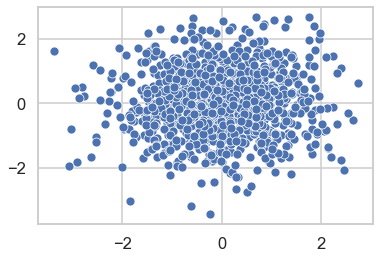

In [119]:
m = 1000

# Input with two features (nx = 2)
x0_gpa = torch.randn(m)
x1_ess = torch.randn(m)
X = torch.vstack([x0_gpa, x1_ess])

sns.scatterplot(x=x0_gpa, y=x1_ess)

X.shape # (nx, m)

torch.Size([1000])

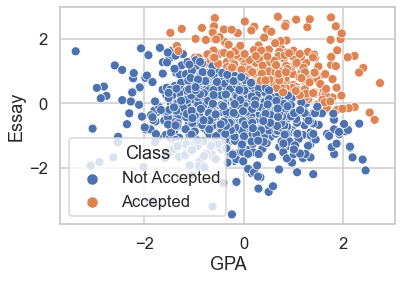

In [120]:
# Create some madeup output

# y = -0.6x + 0.8
# x1 + 0.6x0 - 0.8 = 0
y = torch.zeros(m)
y[x1_ess + 0.6*x0_gpa - 0.8 > 0] = 1

classes = ["Accepted" if target == 1 else "Not Accepted" for target in y]

data = pd.DataFrame({
    "GPA": x0_gpa,
    "Essay": x1_ess,
    "Class": classes
})

sns.scatterplot(data=data, x="GPA", y="Essay", hue="Class")

y.shape

In [121]:
data.describe()

,GPA,Essay
count,1000.000000,1000.000000
mean,-0.043015,0.033222
std,1.009601,1.012926
min,-3.384010,-3.458744
25%,-0.716524,-0.666061
50%,-0.033551,0.012205
75%,0.684368,0.736932
max,2.748099,2.690510


In [122]:
def bce_loss(yhat, y):
    return -(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))


def print_update(epoch, num_epochs, yhat, y):
    losses = bce_loss(yhat, y)
    cost = losses.mean(dim=1).item()
    accuracy = 1 - (yhat - y).abs().mean()

    e = f"{epoch:>4}/{num_epochs}"
    c = f"{cost:0.2f}"
    a = f"{accuracy:0.2f}"
    print(f"{e}: Cost={c}, Accuracy={a}")

    return accuracy

In [123]:
n0 = X.shape[0]

w = torch.randn(n0, 1)
b = torch.zeros(1)

ws = [w.clone()]
bs = [b.clone()]

learning_rate = 10
num_epochs = 100
print_step = 5

prev_accuracy = 0

for epoch in range(num_epochs):
    
    # Forward pass
    yhat = torch.sigmoid(w.T @ X + b)

    # Compute and print metrics
    if epoch % print_step == 0:
        accuracy = print_update(epoch, num_epochs, yhat, y)

    # Backpropagation
    # depends on the loss function and the activation function
    dZ = yhat - y
    dw = (1 / m) * dZ @ X.T
    db = (1 / m) * dZ.sum()

    # Update parameters
    w -= learning_rate * dw.T
    b -= learning_rate * db

    if accuracy > prev_accuracy + 0.05:
        ws.append(w.clone())
        bs.append(b.clone())
        prev_accuracy = accuracy

   0/100: Cost=1.18, Accuracy=0.37
   5/100: Cost=0.10, Accuracy=0.91
  10/100: Cost=0.09, Accuracy=0.92
  15/100: Cost=0.09, Accuracy=0.93
  20/100: Cost=0.08, Accuracy=0.93
  25/100: Cost=nan, Accuracy=0.94
  30/100: Cost=nan, Accuracy=0.94
  35/100: Cost=nan, Accuracy=0.94
  40/100: Cost=nan, Accuracy=0.94
  45/100: Cost=nan, Accuracy=0.95
  50/100: Cost=nan, Accuracy=0.95
  55/100: Cost=nan, Accuracy=0.95
  60/100: Cost=nan, Accuracy=0.95
  65/100: Cost=nan, Accuracy=0.95
  70/100: Cost=nan, Accuracy=0.95
  75/100: Cost=nan, Accuracy=0.95
  80/100: Cost=nan, Accuracy=0.96
  85/100: Cost=nan, Accuracy=0.96
  90/100: Cost=nan, Accuracy=0.96
  95/100: Cost=nan, Accuracy=0.96


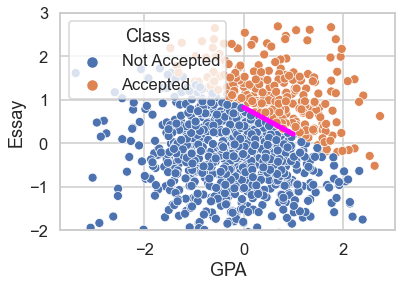

In [124]:
fig, ax = plt.subplots()

sns.scatterplot(data=data, x="GPA", y="Essay", hue="Class", ax=ax)

x_line = torch.tensor([0, 1])
y_line = (-w[0] * x_line - b) / w[1]

(ln,) = ax.plot(x_line, y_line, color="fuchsia", linewidth=5)
ax.set_ylim((-2, 3))

def set_frame_data(i):
    y_line = (-ws[i][0] * x_line - bs[i]) / ws[i][1]
    ln.set_data(x_line, y_line)
    return (ln,)


anim = FuncAnimation(fig, set_frame_data, frames=len(ws))

In [112]:
HTML(anim.to_jshtml())

In [70]:
n0 = X.shape[0]

w = torch.randn(n0, 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

ws = [w.clone()]
bs = [b.clone()]

learning_rate = 10
num_epochs = 100
print_step = 5

prev_accuracy = 0

for epoch in range(num_epochs):
    
    # Forward pass
    yhat = torch.sigmoid(w.T @ X + b)

    # Compute and print metrics
    if epoch % print_step == 0:
        accuracy = print_update(epoch, num_epochs, yhat, y)

    # Backpropagation
    w.grad = None
    b.grad = None
    losses = se_loss(yhat, y)
    cost = losses.mean(dim=1)
    cost.backward()

    # Update parameters
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    if accuracy > prev_accuracy + 0.05:
        ws.append(w.clone())
        bs.append(b.clone())
        prev_accuracy = accuracy

   0/100: Cost=0.93, Accuracy=0.45
   5/100: Cost=0.56, Accuracy=0.57
  10/100: Cost=0.44, Accuracy=0.65
  15/100: Cost=0.38, Accuracy=0.69
  20/100: Cost=0.34, Accuracy=0.72
  25/100: Cost=0.32, Accuracy=0.74
  30/100: Cost=0.30, Accuracy=0.76
  35/100: Cost=0.28, Accuracy=0.77
  40/100: Cost=0.27, Accuracy=0.78
  45/100: Cost=0.26, Accuracy=0.79
  50/100: Cost=0.25, Accuracy=0.79
  55/100: Cost=0.24, Accuracy=0.80
  60/100: Cost=0.23, Accuracy=0.81
  65/100: Cost=0.23, Accuracy=0.81
  70/100: Cost=0.22, Accuracy=0.82
  75/100: Cost=0.21, Accuracy=0.82
  80/100: Cost=0.21, Accuracy=0.82
  85/100: Cost=0.21, Accuracy=0.83
  90/100: Cost=0.20, Accuracy=0.83
  95/100: Cost=0.20, Accuracy=0.83


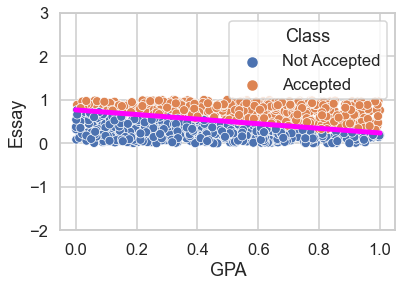

In [47]:
fig, ax = plt.subplots()

sns.scatterplot(data=data, x="GPA", y="Essay", hue="Class", ax=ax)

x_line = torch.tensor([0, 1]).numpy()
y_line = (-w[0].detach().numpy() * x_line - b.detach().numpy()) / w[1].detach().numpy()

(ln,) = ax.plot(x_line, y_line, color="fuchsia", linewidth=5)
ax.set_ylim((-2, 3))

def set_frame_data(i):
    y_line = (-ws[i][0] * x_line - bs[i]) / ws[i][1]
    ln.set_data(x_line, y_line)
    return (ln,)


anim = FuncAnimation(fig, set_frame_data, frames=len(ws))

In [48]:
def se_loss(yhat, y):
    return (yhat - y).pow(2)

In [90]:
neurons_per_layer = (X.shape[0], 10, 10, 1)

WParams = []
bParams = []
for nl, nlminus1 in zip(neurons_per_layer[1:], neurons_per_layer):
    WParams.append(torch.randn(nl, nlminus1, requires_grad=True))
    bParams.append(torch.randn(nl, 1, requires_grad=True))

learning_rate = 2
num_epochs = 100
print_step = 5

for epoch in range(num_epochs):

    # Forward propagation
    Alminus1 = X
    for W, b in zip(WParams, bParams):
        Alminus1 = torch.sigmoid(W @ Alminus1 + b)
    yhat = Alminus1

    # Compute and print metrics
    if epoch % print_step == 0:
        accuracy = print_update(epoch, num_epochs, yhat, y)

    # Backpropagation
    for W, b in zip(WParams, bParams):
        W.grad = None
        b.grad = None
    losses = bce_loss(yhat, y)
    cost = losses.mean(dim=1)
    cost.backward()

    # Update parameters
    with torch.no_grad():
        for W, b in zip(WParams, bParams):
            W -= learning_rate * W.grad
            b -= learning_rate * b.grad

   0/100: Cost=0.74, Accuracy=0.52
   5/100: Cost=1.01, Accuracy=0.49
  10/100: Cost=0.78, Accuracy=0.55
  15/100: Cost=0.68, Accuracy=0.54
  20/100: Cost=0.66, Accuracy=0.59
  25/100: Cost=0.66, Accuracy=0.57
  30/100: Cost=0.61, Accuracy=0.63
  35/100: Cost=0.55, Accuracy=0.64
  40/100: Cost=0.49, Accuracy=0.69
  45/100: Cost=0.44, Accuracy=0.71
  50/100: Cost=0.38, Accuracy=0.75
  55/100: Cost=0.35, Accuracy=0.77
  60/100: Cost=0.30, Accuracy=0.80
  65/100: Cost=0.29, Accuracy=0.81
  70/100: Cost=0.26, Accuracy=0.83
  75/100: Cost=0.24, Accuracy=0.84
  80/100: Cost=0.22, Accuracy=0.85
  85/100: Cost=0.21, Accuracy=0.86
  90/100: Cost=0.19, Accuracy=0.87
  95/100: Cost=0.19, Accuracy=0.88


In [78]:
temp1 = [i for i in range(10)]
temp2 = [i*2 + 5 for i in range(15)]
temp1, temp2

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33])

In [80]:
list(zip(temp1, temp2))

[(0, 5),
 (1, 7),
 (2, 9),
 (3, 11),
 (4, 13),
 (5, 15),
 (6, 17),
 (7, 19),
 (8, 21),
 (9, 23)]

In [84]:
for t1, t2 in zip(temp1[1::2], temp2[-1::-1]):
    print(t1, t2)

1 33
3 31
5 29
7 27
9 25


In [102]:
n0 = X.shape[0]
n1 = 10
n2 = 10
n3 = 4
n4 = 1

model = torch.nn.Sequential(
    torch.nn.Linear(in_features=n0, out_features=n1),
    torch.nn.Sigmoid(),
    torch.nn.Linear(in_features=n1, out_features=n2),
    torch.nn.Sigmoid(),
    torch.nn.Linear(in_features=n2, out_features=n3),
    torch.nn.Sigmoid(),
    torch.nn.Linear(in_features=n3, out_features=n4),
    torch.nn.Sigmoid(),
)

bce_loss_pt = torch.nn.BCELoss()

# Hyperparameter
num_epochs = 100

for epoch in range(num_epochs):
    
    # Forward pass
    yhat = model(X.T)
    
    # Backprop
    model.zero_grad()
    loss = bce_loss_pt(yhat, y.unsqueeze(1))
    loss.backward()
    
    # Update parameters
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

In [94]:
yhat.shape

torch.Size([1000, 1])

In [95]:
y.shape

torch.Size([1000])

In [97]:
y.unsqueeze(1).shape

torch.Size([1000, 1])

In [100]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0222,  0.6198],
         [-0.0090,  0.0450],
         [-0.3510,  0.4509],
         [-0.0345,  0.6429],
         [-0.5146, -0.6334],
         [-0.4119, -0.1067],
         [-0.4858,  0.2174],
         [ 0.3426,  0.5948],
         [ 0.6665,  0.6609],
         [ 0.0124,  0.6428]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5637, -0.5001, -0.5034,  0.2050, -0.3033,  0.1097, -0.3448,  0.3612,
         -0.3672,  0.5175], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1306,  0.1246, -0.0060, -0.2745, -0.0898,  0.1024, -0.1281,  0.0290,
           0.1591, -0.0639],
         [ 0.0565,  0.0642, -0.2335,  0.2680,  0.0587, -0.1330,  0.0084, -0.1764,
           0.0643, -0.3154],
         [-0.3055, -0.2877, -0.1587,  0.0687,  0.2038, -0.2602, -0.2342,  0.0013,
           0.0247, -0.2247],
         [ 0.0806,  0.3070,  0.2272, -0.0253, -0.2595,  0.2537,  0.2148, -0.3141,
          -0.0625, -0.0290],
         [-0.2857,  0.0747,  0.0394,  0.1822,

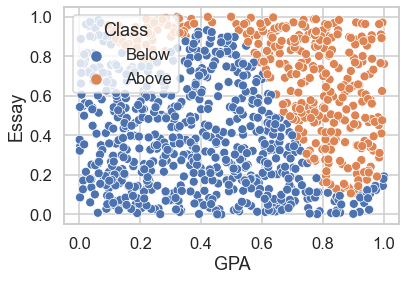

In [109]:
y = torch.zeros(m)
noise = 0.25 * torch.sin(x0_gpa * 3 * pi)
y[x1_ess + x0_gpa - 1.2 + noise > 0] = 1

classes = ["Above" if target == 1 else "Below" for target in y]
data = pd.DataFrame({"GPA": x0_gpa, "Essay": x1_ess, "Class": classes})
sns.scatterplot(data=data, x="GPA", y="Essay", hue="Class");